## `geopandas`
python library that extends pandas to geospatial data.
## reproducible file paths


In [1]:
import os 
import geopandas as gpd
import matplotlib.pyplot as plt


TO import data we first use `os` package to create a reproducible file path:

In [2]:
fp = os.path.join("data\gbif_sus_scrofa_california\gbif_sus_scrofa_california\gbif_sus_scrofa_california.shp")
fp

'data\\gbif_sus_scrofa_california\\gbif_sus_scrofa_california\\gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)

In [4]:
fp = os.path.join("data\ca_state_boundary\ca_state_boundary\ca_state_boundary.shp")
ca_boundary = gpd.read_file(fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `GeoSeries` and `GeoDataFrame
`geopandas.GeoDataFrame` = core structure in geopandas = `pandas.DataFrame` plus a dedicated geometry column hat can perform spatial operations

**geometry column** holds the geometry (point, polygons, etc) of each spatial feature, the type is `geopandas.GeoSeries`

In [5]:
# Check the data type of the pigs dataframe
print(type(pigs))

# Check datatype of geometry column
print(type(pigs.geometry))

# Check data type of gbifID
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [6]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [7]:
# Check type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometry type of the single deatrure in the CA state boundary?


In [8]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS
**coordinate reference system (CRS)**= instructuons to locate each spatial feature

In [9]:
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# Examine CRS details
print("Ellipsoid:", pigs.crs.ellipsoid)
print("Datum:", pigs.crs.datum)
print("Is geographic:", pigs.crs.is_geographic)
print("Is projected:", pigs.crs.is_projected)

Ellipsoid: WGS 84
Datum: World Geodetic System 1984 ensemble
Is geographic: True
Is projected: False


In [11]:
# Obtain the geographic extent of the geo-dataframe (gives xmin, ymin, xmax, ymax)
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [12]:
# Examine CRS and extent of California boundary
print("CRS:", ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

CRS: EPSG:4326 

[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [13]:
# Check that the CRSs match
pigs.crs == ca_boundary.crs

True

## Data wrangling
use `pandas` data wrangling to wrangle `pandas.GeoDataFrames`

In [14]:
# Examine pig observations by year
pigs["year"].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [15]:
# Select data from 2020 onrwards
pigs_recent = pigs[pigs["year"]>=2020]

#Check the length of og dataframe
print("Total number of observations", len(pigs))

# Check length of new dataframe
print("Number of observations since 2020", len(pigs_recent))

Total number of observations 1046
Number of observations since 2020 606


# Create a map (preliminary)
`gpd.GeoDataFrame` has a `plot` method that quickly creates a map for our daa using the geospatial info


<Axes: >

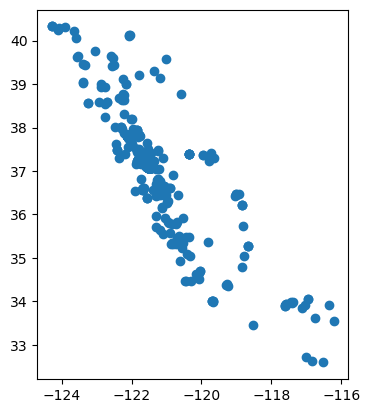

In [16]:
pigs_recent.plot()

## `matplotlib` 
We can interact with `matplotlib` via `pyplot` as an interface

Matplotlib graphs data in a figure 

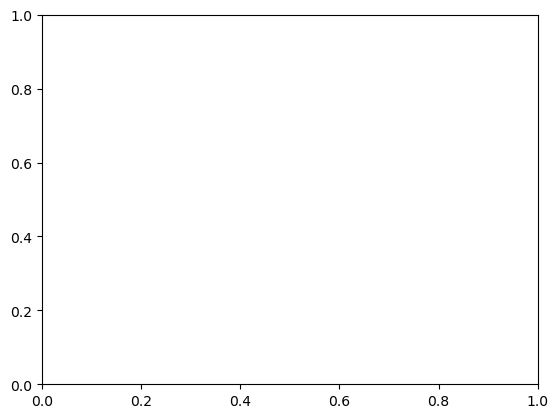

In [20]:
# Initialize empty figure (fig) and axis (ax)
fig, ax= plt.subplots()

## Adding a layer

When using matplotlib, it can be useful to think of creating a plot as adding layers of an axis

Ex: the first layer we want to add to our axis in the `pigs_recent` point data


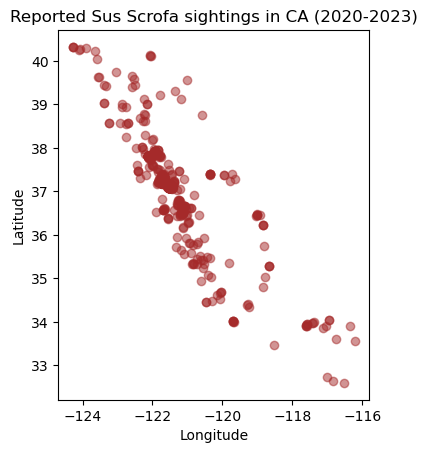

In [24]:
# Initialize empty figure and axis 
fig, ax = plt.subplots()

# Add pigs point plot
pigs_recent.plot(ax=ax, # Add plot to axis
                 alpha = 0.5, 
                 color = "brown" # Update color, 
                 )

# Update axis
ax.set_title("Reported Sus Scrofa sightings in CA (2020-2023)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

## Customization

Some can be done directly in plot() method for the dataframe, some others is done updating the attributes of axis `ax`